In [1]:
import numpy as np
import cv2 
import rawpy
from matplotlib import pyplot as plt
import os
import json

In [2]:
# https://gitee.com/mindspore/models/blob/master/research/cv/RAOD/dataset/dataset.py    
# -> 1, H, W
def get_raw(fn, input_shape):
    raw = np.fromfile(fn, dtype=np.uint8)
    raw = raw[0::3] + raw[1::3] * 256 + raw[2::3] * 65536
    raw = raw.reshape((1,) + input_shape).astype(np.float32)
    return raw

In [3]:
def pack(image):
    H, W, C = image.shape
    assert C == 1
    result = np.concatenate((image[0:H:2, 0:W:2, :],     # R
                            image[0:H:2, 1:W:2, :],                     # GR
                            image[1:H:2, 0:W:2, :],                     # GB
                            image[1:H:2, 1:W:2, :]), axis=2)            # B
    return result

In [4]:
raw_fp = os.path.join("data", "day-03219.raw")
ann_fp = os.path.join("data", "day-03219.json")

In [5]:
ann = json.load(open(ann_fp, 'rb'))
ann.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

In [6]:
raw = np.expand_dims(get_raw(raw_fp, (ann['imageHeight'], ann['imageWidth']))[0], -1)
raw /= 2**24

In [7]:
raw.shape, raw.min(), raw.max(),

((1856, 2880, 1), 2.515316e-05, 0.95161563)

In [8]:
gray = raw ** (1/8.2) 

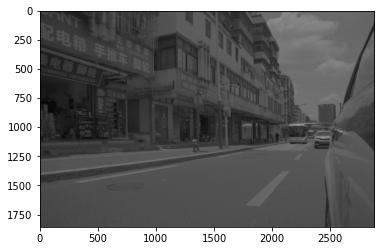

In [9]:
plt.imshow(gray, cmap='gray')

In [10]:
rggb =  pack(gray)

In [11]:
rg1b, rg2b = np.stack([rggb[...,0], rggb[...,1], rggb[...,3]], -1), np.stack([rggb[...,0], rggb[...,2], rggb[...,3]], -1)

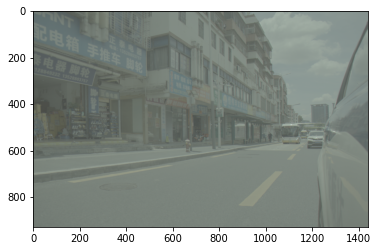

In [12]:
plt.imshow(rg1b, )

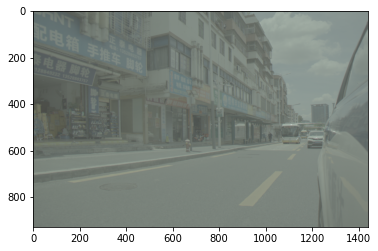

In [13]:
plt.imshow(rg2b, )

In [14]:
rg1b.shape

(928, 1440, 3)

In [15]:
ann

{'version': '4.5.6',
 'flags': {},
 'shapes': [{'label': 'Cyclist',
   'points': [[2026, 1037], [2064, 1128]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Pedestrian',
   'points': [[2017, 1036], [2049, 1122]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Tram',
   'points': [[2117, 959], [2300, 1142]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Tram',
   'points': [[2299, 1023], [2364, 1097]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Car',
   'points': [[2343, 1025], [2531, 1181]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}},
  {'label': 'Tram',
   'points': [[2361, 1021], [2401, 1055]],
   'group_id': None,
   'shape_type': 'rectangle',
   'flags': {}}],
 'imagePath': 'day-03219.jpg',
 'imageData': None,
 'imageHeight': 1856,
 'imageWidth': 2880}

In [16]:
classes = ['Car', 'Pedestrian', 'Cyclist', 'Tram', 'Tricycle', 'Truck']
colors = [[1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1]]
cc_dict = {k : v for k, v in zip(classes, colors)}

In [17]:
labeled = np.stack([gray.copy()[...,0]] * 3, -1)
for label in ann['shapes']:
    print(label, label['points'])
    pts = label['points']
    x1, y1 = pts[0]
    x2, y2 = pts[1]
    cv2.rectangle(labeled, (x1, y1), (x2, y2), cc_dict[label['label']], 5)

{'label': 'Cyclist', 'points': [[2026, 1037], [2064, 1128]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}} [[2026, 1037], [2064, 1128]]
{'label': 'Pedestrian', 'points': [[2017, 1036], [2049, 1122]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}} [[2017, 1036], [2049, 1122]]
{'label': 'Tram', 'points': [[2117, 959], [2300, 1142]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}} [[2117, 959], [2300, 1142]]
{'label': 'Tram', 'points': [[2299, 1023], [2364, 1097]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}} [[2299, 1023], [2364, 1097]]
{'label': 'Car', 'points': [[2343, 1025], [2531, 1181]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}} [[2343, 1025], [2531, 1181]]
{'label': 'Tram', 'points': [[2361, 1021], [2401, 1055]], 'group_id': None, 'shape_type': 'rectangle', 'flags': {}} [[2361, 1021], [2401, 1055]]


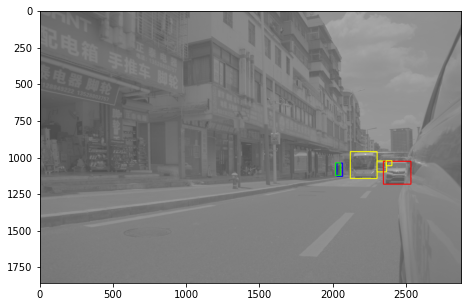

In [18]:
plt.rcParams["figure.figsize"] = (20,5)
plt.imshow(labeled, )